In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split, ParameterGrid
from sktime.performance_metrics.forecasting import mean_absolute_scaled_error, mean_squared_error, mean_absolute_error
import warnings
import time
from pmdarima.arima import auto_arima
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('../data/regional_univariate_data.csv')
enc = pd.read_csv('../data/regional_datasets/univariate/enc_data_univ.csv').drop(columns = 'Unnamed: 0')
esc = pd.read_csv('../data/regional_datasets/univariate/esc_data_univ.csv').drop(columns = 'Unnamed: 0')
midatl = pd.read_csv('../data/regional_datasets/univariate/mid_atlantic_data_univ.csv').drop(columns = 'Unnamed: 0')
mount = pd.read_csv('../data/regional_datasets/univariate/mountain_data_univ.csv').drop(columns = 'Unnamed: 0')
ne = pd.read_csv('../data/regional_datasets/univariate/new_england_data_univ.csv').drop(columns = 'Unnamed: 0')
pac = pd.read_csv('../data/regional_datasets/univariate/pacific_data_univ.csv').drop(columns = 'Unnamed: 0')
satl = pd.read_csv('../data/regional_datasets/univariate/south_atlantic_data_univ.csv').drop(columns = 'Unnamed: 0')
wnc = pd.read_csv('../data/regional_datasets/univariate/wnc_data_univ.csv').drop(columns = 'Unnamed: 0')
wsc = pd.read_csv('../data/regional_datasets/univariate/wsc_data_univ.csv').drop(columns = 'Unnamed: 0')

In [3]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(actual,forecast): 
    actual, forecast = np.array(actual), np.array(forecast)
    return 100/len(actual) * np.sum(2 * np.abs(forecast - actual) / (np.abs(actual) + np.abs(forecast)))

East North Central
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[7] intercept   : AIC=inf, Time=1.63 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=17543.450, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=17465.304, Time=0.11 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=17482.116, Time=0.14 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=17541.501, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=17472.156, Time=0.01 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=17466.994, Time=0.34 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=17465.028, Time=0.17 sec
 ARIMA(1,0,0)(0,1,2)[7] intercept   : AIC=17466.977, Time=0.29 sec
 ARIMA(1,0,0)(1,1,2)[7] intercept   : AIC=inf, Time=1.67 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=17543.194, Time=0.09 sec
 ARIMA(2,0,0)(0,1,1)[7] intercept   : AIC=17451.873, Time=0.23 sec
 ARIMA(2,0,0)(0,1,0)[7] intercept   : AIC=17468.504, Time=0.03 sec
 ARIMA(2,0,0)(1,1,

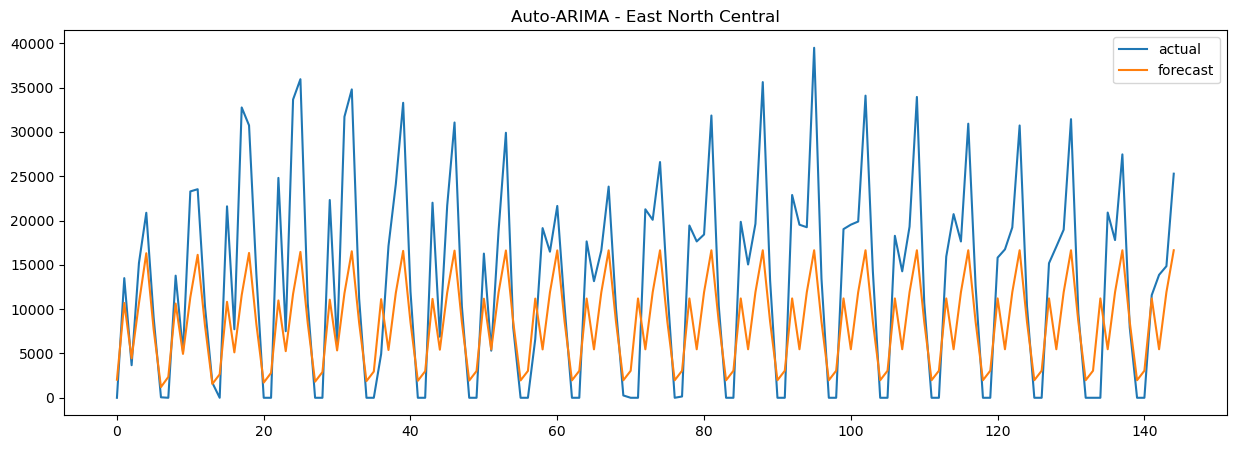

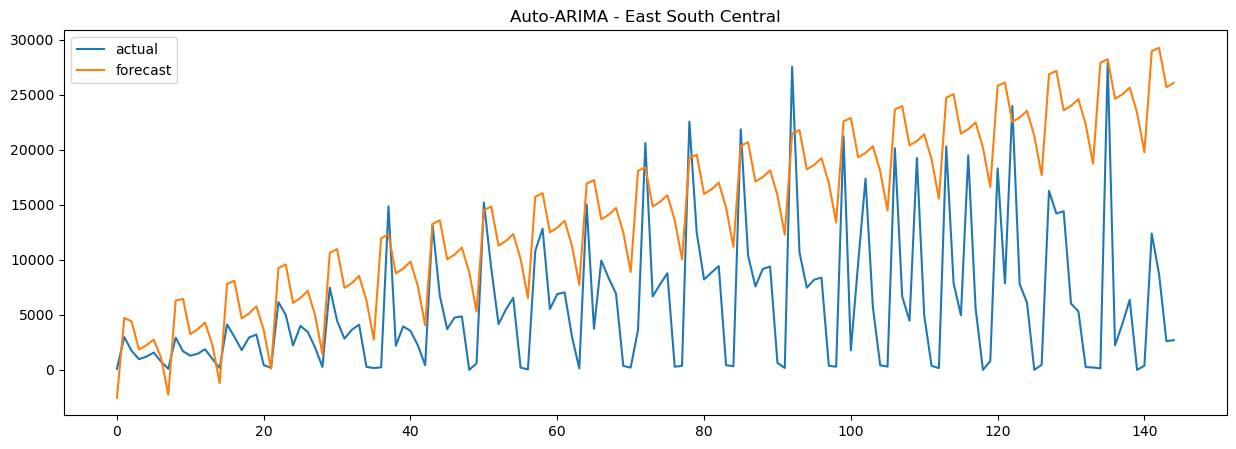

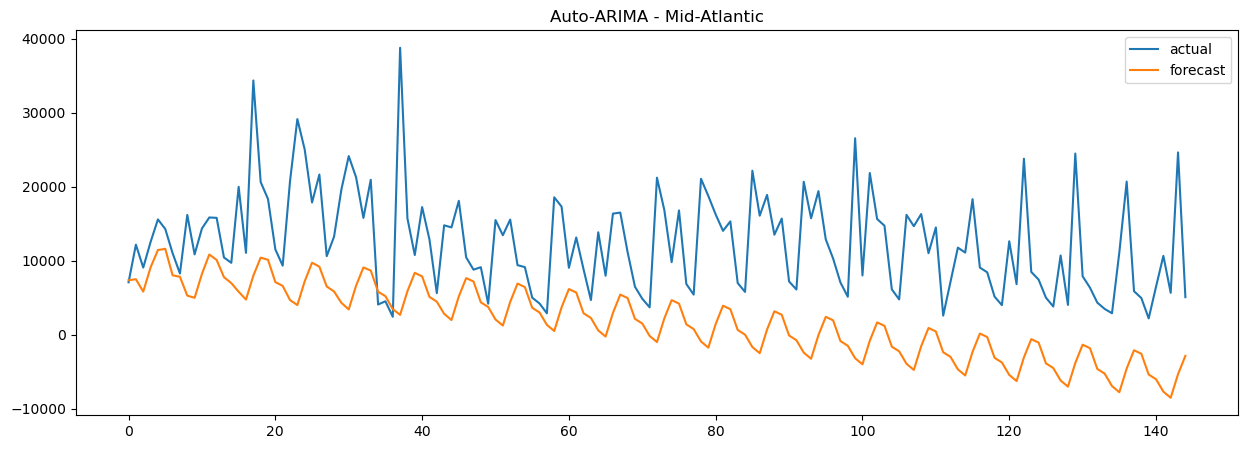

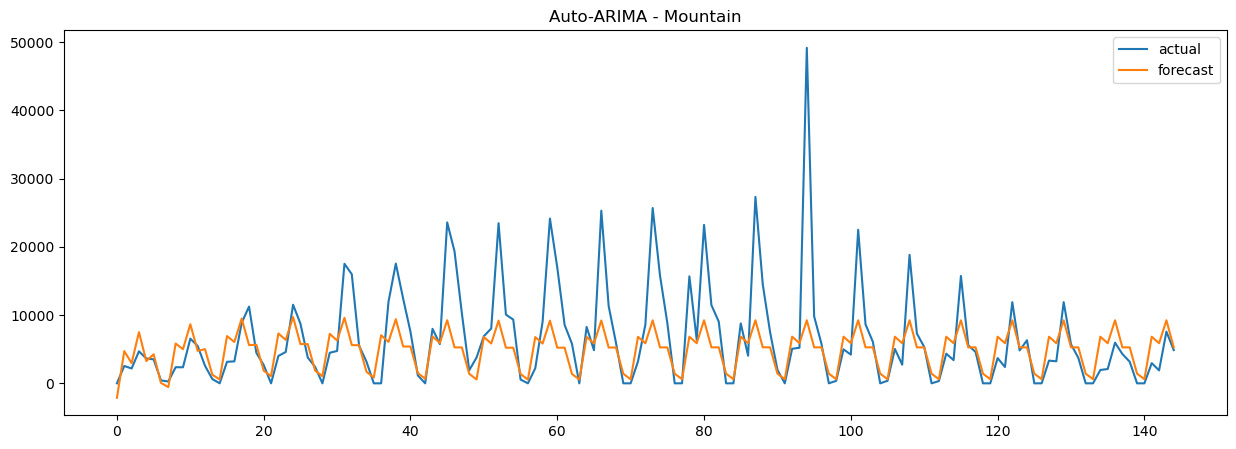

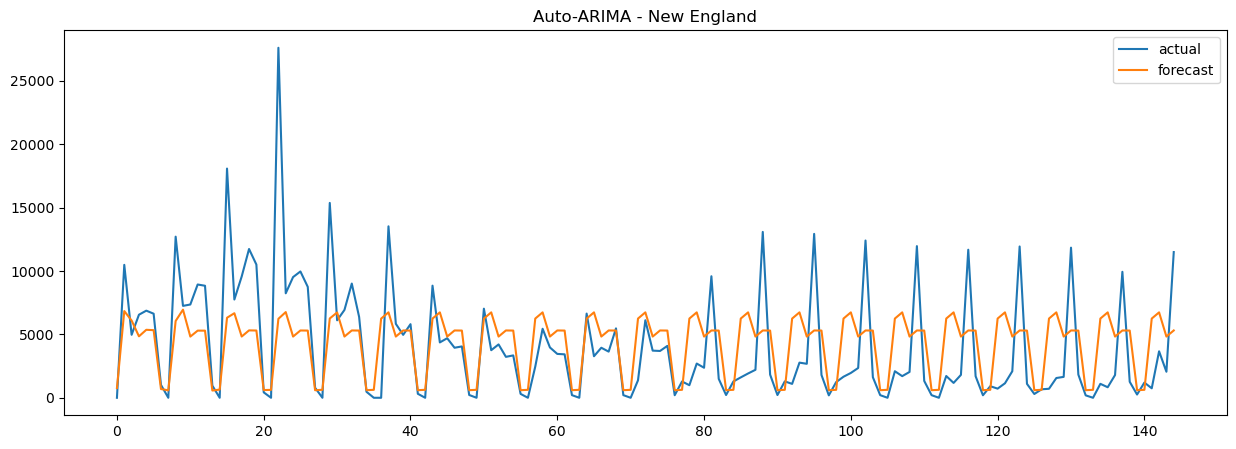

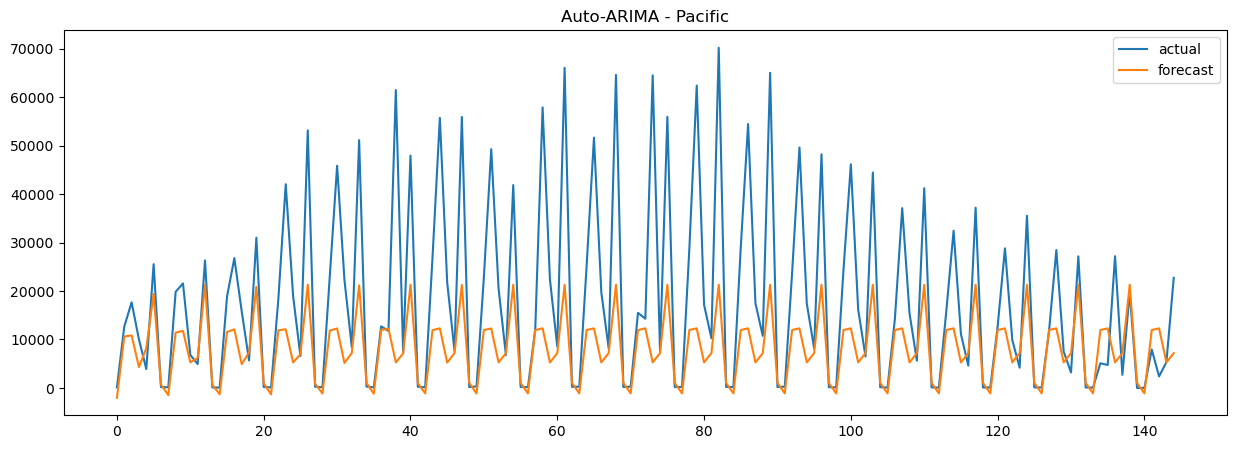

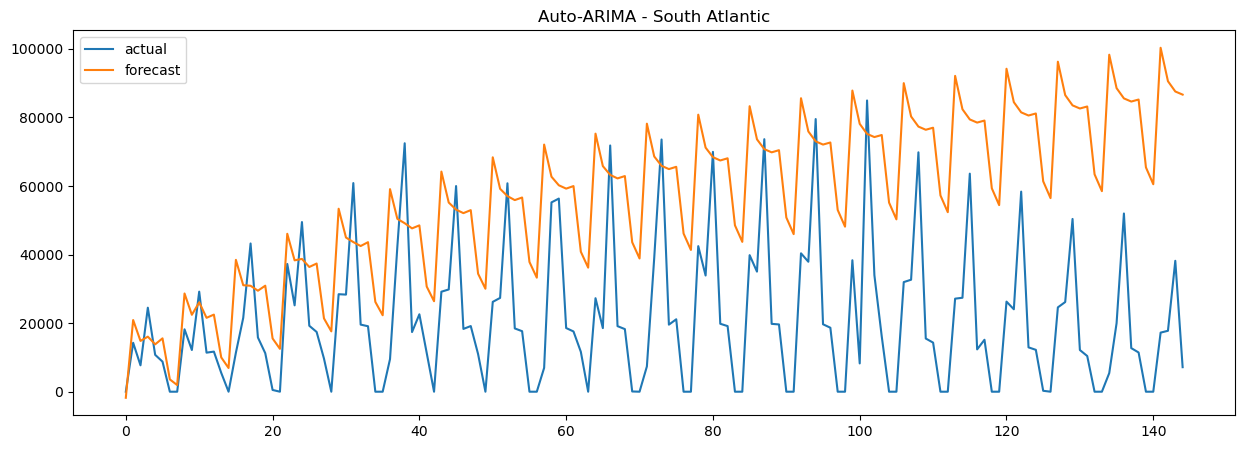

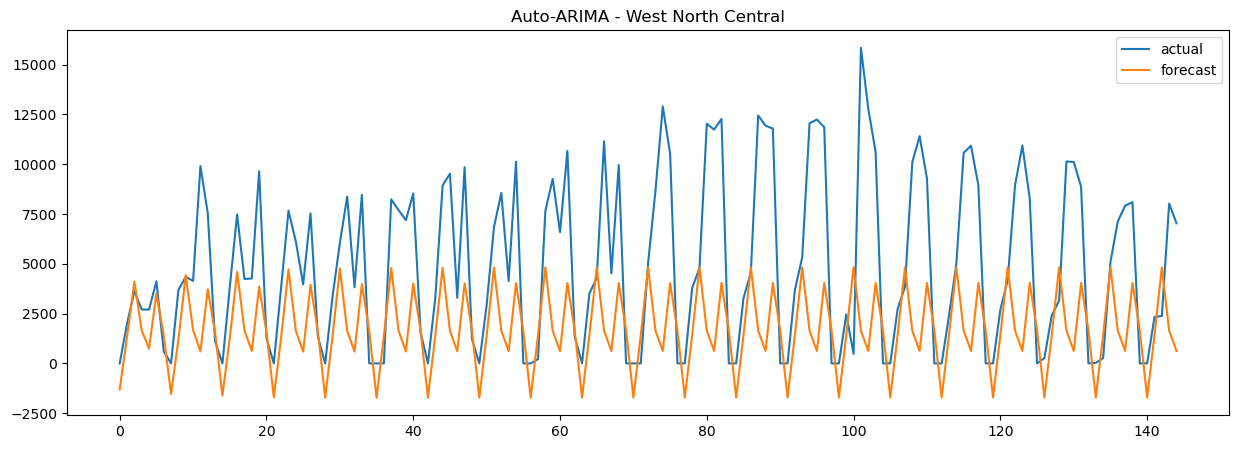

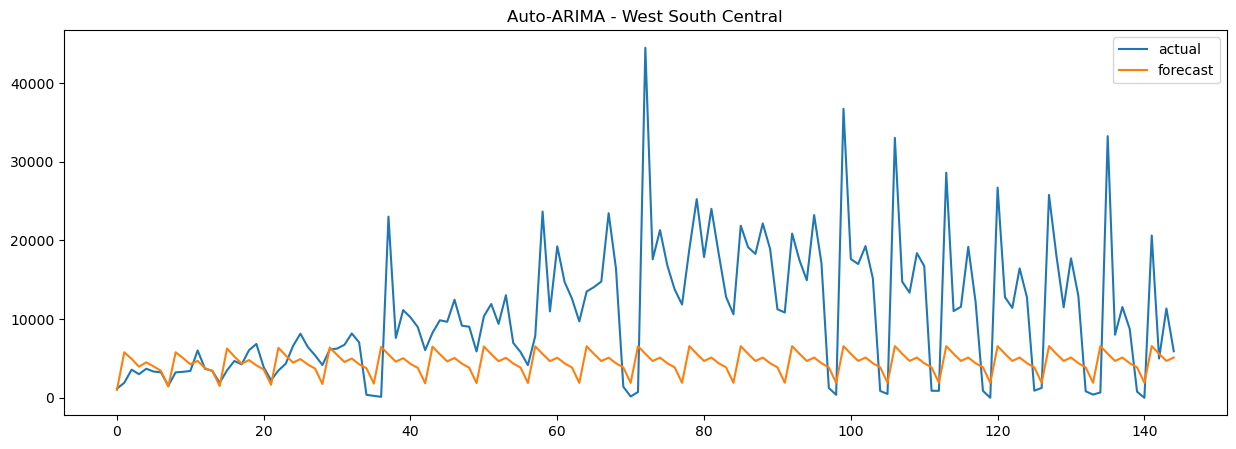

In [41]:
params = []
smapes = []
mases = []
for data1 in [enc, esc, midatl, mount, ne, pac, satl, wnc, wsc]:
    start = time.time()
    print(data1.region.unique()[0])
    data = data1[['date', 'new_confirmed']].rename(columns = {'date': 'ds', 'new_confirmed': 'y'})
    size = round(data.shape[0]*0.15)
    train = data.iloc[:-size]
    test = data.iloc[-size:].reset_index().drop(columns = 'index')
    model = auto_arima(train.y, start_p = 2, max_p = 10, 
                       start_d = 2, max_d = 10, start_q = 2, max_q = 10,
                       start_P=1, start_Q=1,
                       max_P=2, D=1, max_Q=2, m = 7,
                       seasonal = True, stepwise = True, trace=True,
                       error_action='ignore', suppress_warnings=True)
    print(model.aic())
    train_pred=model.fittedvalues()
    test_pred=model.predict(n_periods=len(test))
    # pd.concat([(pd.concat([train, train_pred], axis = 1)).rename(columns = {"ds": 'date', "y": "actual", 0: "forecast"}), 
    #        (pd.concat([test, test_pred.reset_index().drop(columns = 'index')], axis = 1)).rename(columns = {"ds": 'date', "y": "actual", 0: "forecast"})]
    #        ,axis = 0).reset_index().drop(columns = 'index').plot(figsize = (15,5))
    df = pd.concat([test, test_pred.reset_index().drop(columns = 'index')], axis = 1).rename(columns = {0:'forecast'})
    plt.figure(figsize = (15,5))
    plt.plot(df.y)
    plt.plot(df.forecast)
    plt.legend(['actual', 'forecast'])
    plt.title('Auto-ARIMA - ' + data1.region.unique()[0])
    print(data1.region.unique()[0])
    print('MASE: ', mean_absolute_scaled_error(df.y, df.forecast, y_train = train.y))
    print('RMSE: ', mean_squared_error(df.y, df.forecast, squared = False))
    print('MAE: ', mean_absolute_error(df.y, df.forecast))
    print(time.time() - start)


East North Central
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18184.795, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18702.100, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18436.184, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18196.199, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18700.101, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=18179.286, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=18332.838, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=18171.373, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=18262.361, Time=0.03 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=18165.263, Time=0.07 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=18234.834, Time=0.03 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=18149.857, Time=0.09 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=18236.295, Time=0.04 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=17508.313, Time=0.34 sec


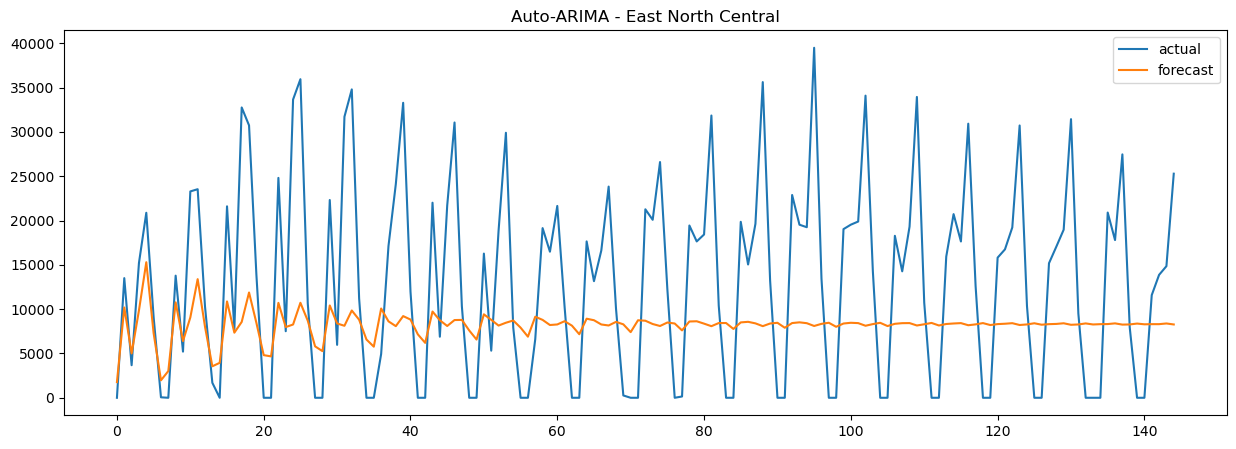

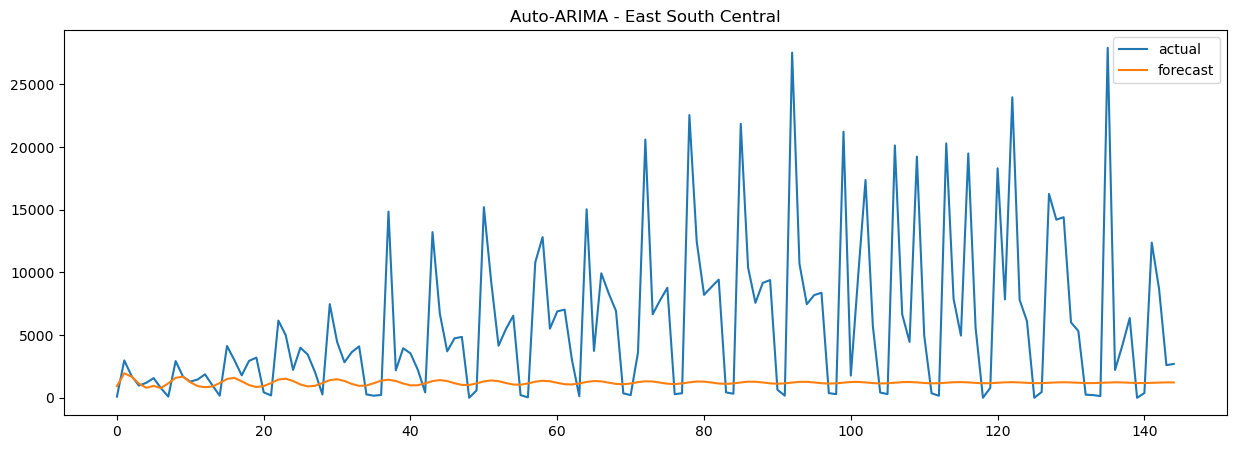

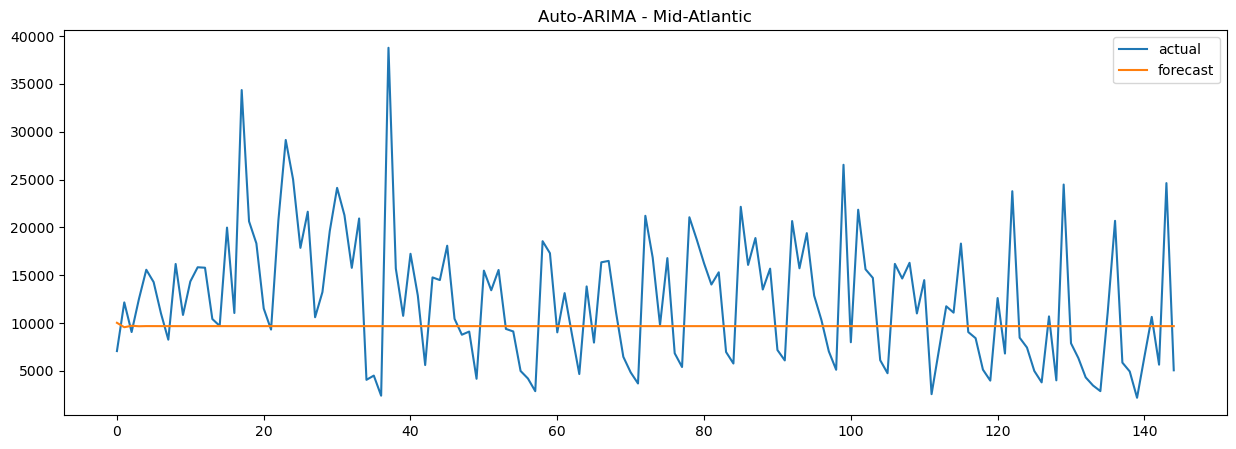

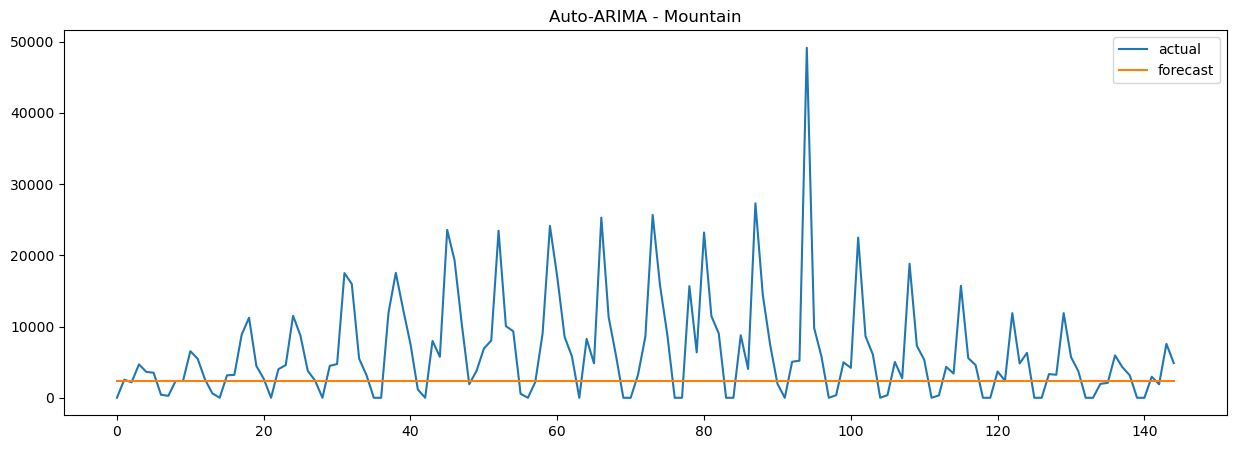

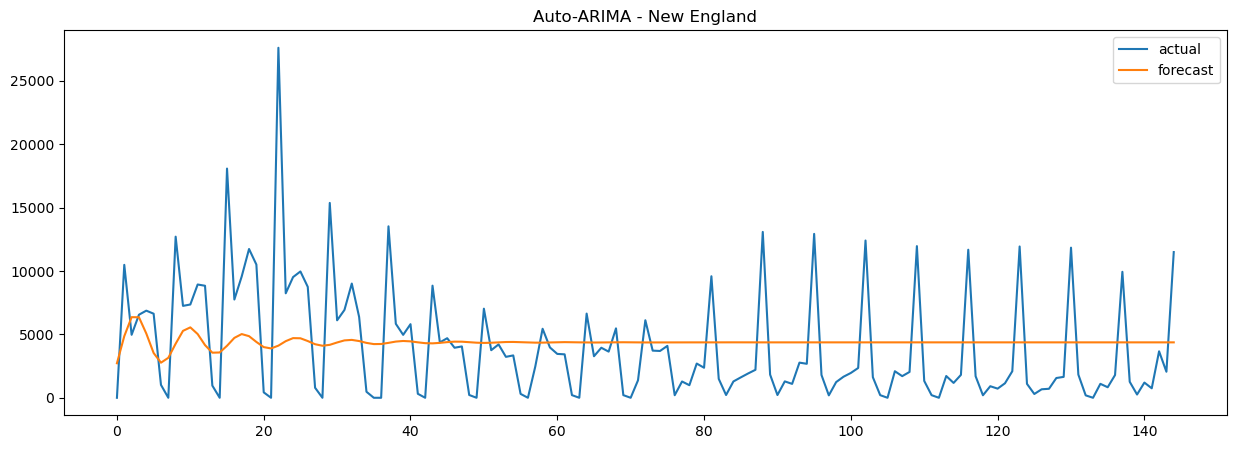

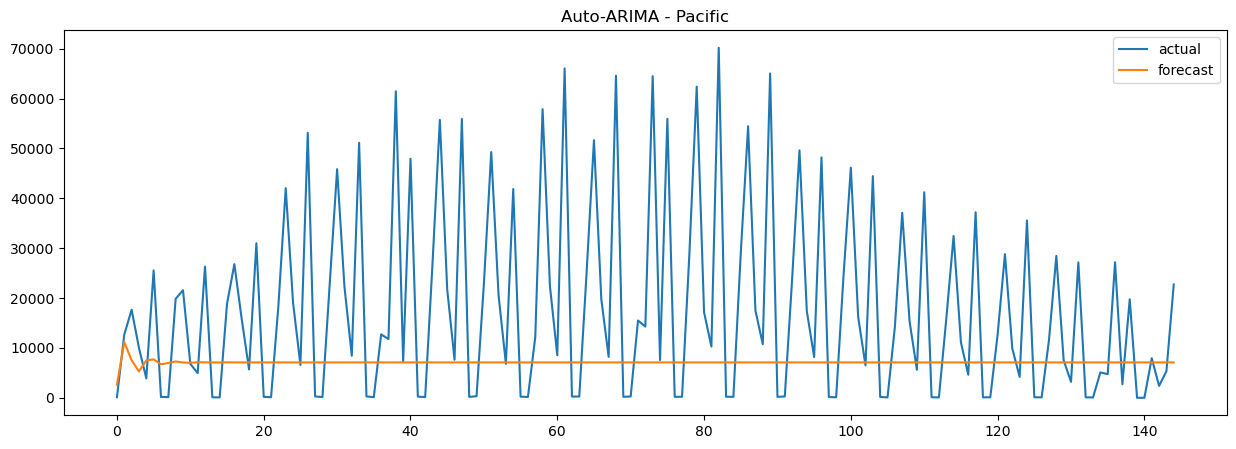

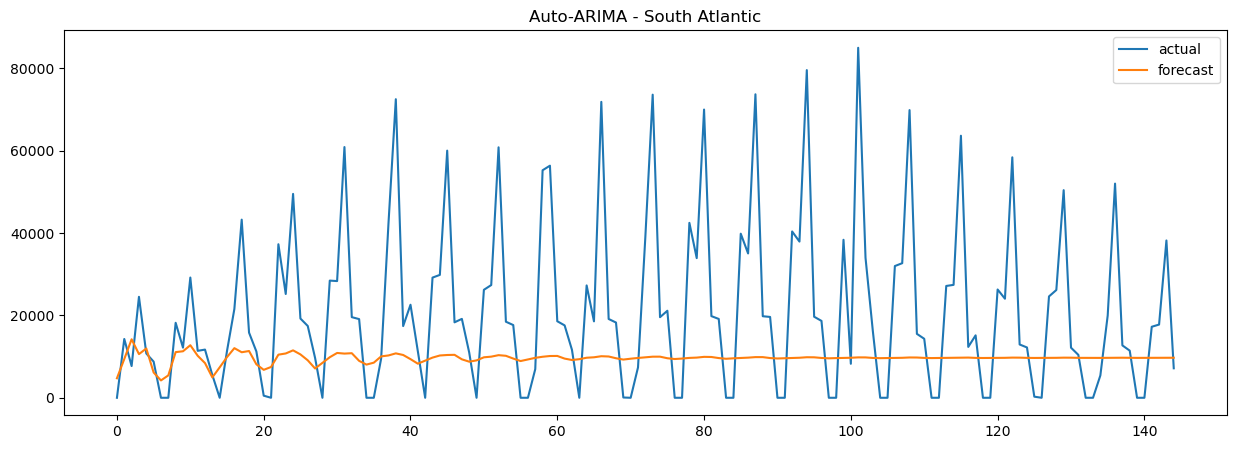

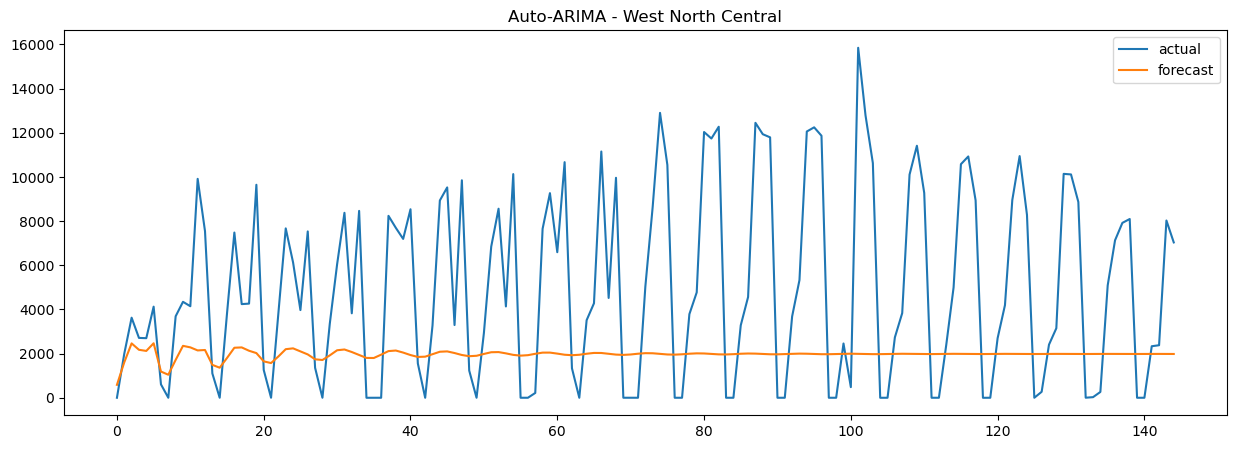

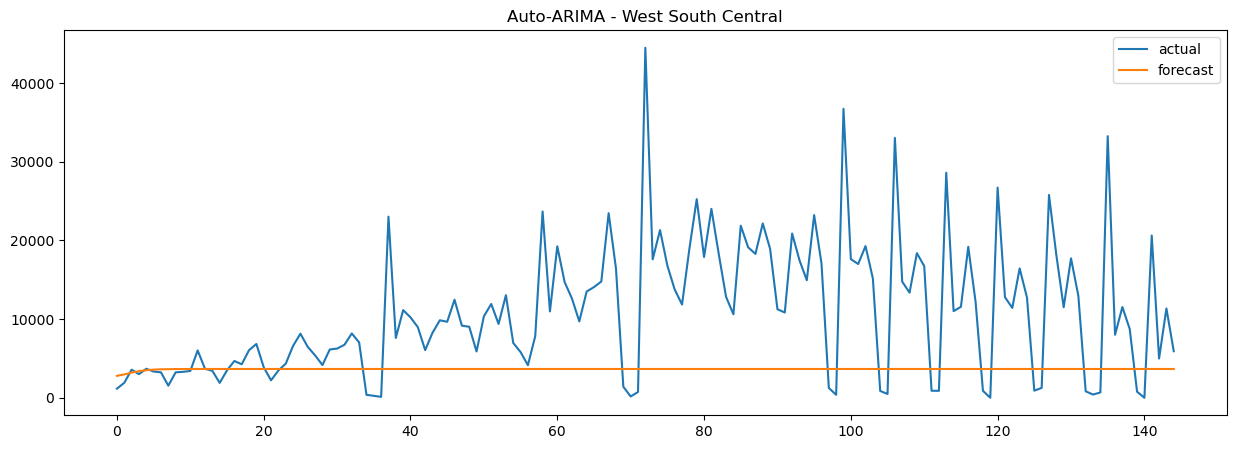

In [40]:
params = []
smapes = []
mases = []
for data1 in [enc, esc, midatl, mount, ne, pac, satl, wnc, wsc]:
    start = time.time()
    print(data1.region.unique()[0])
    data = data1[['date', 'new_confirmed']].rename(columns = {'date': 'ds', 'new_confirmed': 'y'})
    size = round(data.shape[0]*0.15)
    train = data.iloc[:-size]
    test = data.iloc[-size:].reset_index().drop(columns = 'index')
    model = auto_arima(train.y, start_p = 1, max_p = 10, 
                       start_d = 1, max_d = 10, start_q = 1, max_q = 10,
                       seasonal = True, stepwise = True, trace=True,
                       error_action='ignore', suppress_warnings=True)
    print(model.aic())
    train_pred=model.fittedvalues()
    test_pred=model.predict(n_periods=len(test))
    # pd.concat([(pd.concat([train, train_pred], axis = 1)).rename(columns = {"ds": 'date', "y": "actual", 0: "forecast"}), 
    #        (pd.concat([test, test_pred.reset_index().drop(columns = 'index')], axis = 1)).rename(columns = {"ds": 'date', "y": "actual", 0: "forecast"})]
    #        ,axis = 0).reset_index().drop(columns = 'index').plot(figsize = (15,5))
    df = pd.concat([test, test_pred.reset_index().drop(columns = 'index')], axis = 1).rename(columns = {0:'forecast'})
    plt.figure(figsize = (15,5))
    plt.plot(df.y)
    plt.plot(df.forecast)
    plt.legend(['actual', 'forecast'])
    plt.title('Auto-ARIMA - ' + data1.region.unique()[0])
    print(data1.region.unique()[0])
    print('MASE: ', mean_absolute_scaled_error(df.y, df.forecast, y_train = train.y))
    print('RMSE: ', mean_squared_error(df.y, df.forecast, squared = False))
    print('MAE: ', mean_absolute_error(df.y, df.forecast))
    print(time.time() - start)

In [24]:
train

,ds,y
0,2020-01-22,0.0
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0
...,...,...
769,2022-03-01,2177.0
770,2022-03-02,6958.0
771,2022-03-03,5901.0
772,2022-03-04,5909.0


In [7]:
(pd.concat([test, test_pred], axis = 1)).rename(columns = {"ds": 'date', "y": "actual", 0: "forecast"})

,date,actual,forecast
0,2022-03-06,828.0,NaN
1,2022-03-07,4373.0,NaN
2,2022-03-08,7669.0,NaN
3,2022-03-09,6091.0,NaN
4,2022-03-10,6682.0,NaN
...,...,...,...
963,NaN,NaN,5013.664551
964,NaN,NaN,5013.664551
965,NaN,NaN,5013.664551
966,NaN,NaN,5013.664551
